In [26]:
# Import all required ML modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [27]:
from sklearn.datasets import load_iris
data=load_iris()

In [28]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [29]:
df=pd.DataFrame(data.data,columns=data.feature_names)
y=data.target
X=df

In [30]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [33]:
#WE WILL build model using gini,you can ue entropy also
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy')

In [34]:
classifier.fit(X_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.4, 0.9, 'x[3] <= 0.8\nentropy = 1.582\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'x[3] <= 1.65\nentropy = 0.996\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'x[2] <= 5.0\nentropy = 0.431\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'x[0] <= 6.05\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5, 'x[2] <= 4.85\nentropy = 0.187\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.7, 0.3, 'x[1] <= 3.1\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'entropy = 0.0\nsamples = 

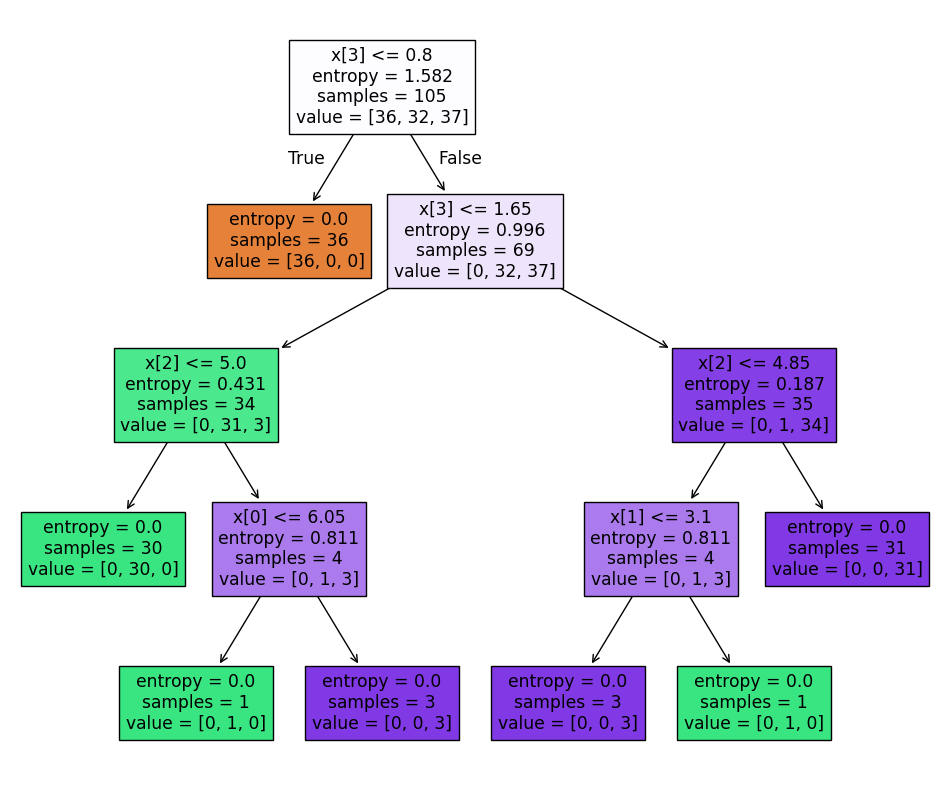

In [36]:
from sklearn import tree 
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)

In [37]:
#as we can see data  is being overfitted so we need to ontrol it using pruning


In [ ]:
#we do postpruning
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=2)

In [39]:
classifier.fit(X_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.4, 0.8333333333333334, 'x[2] <= 2.6\nentropy = 1.582\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 1.65\nentropy = 0.996\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.431\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.187\nsamples = 35\nvalue = [0, 1, 34]')]

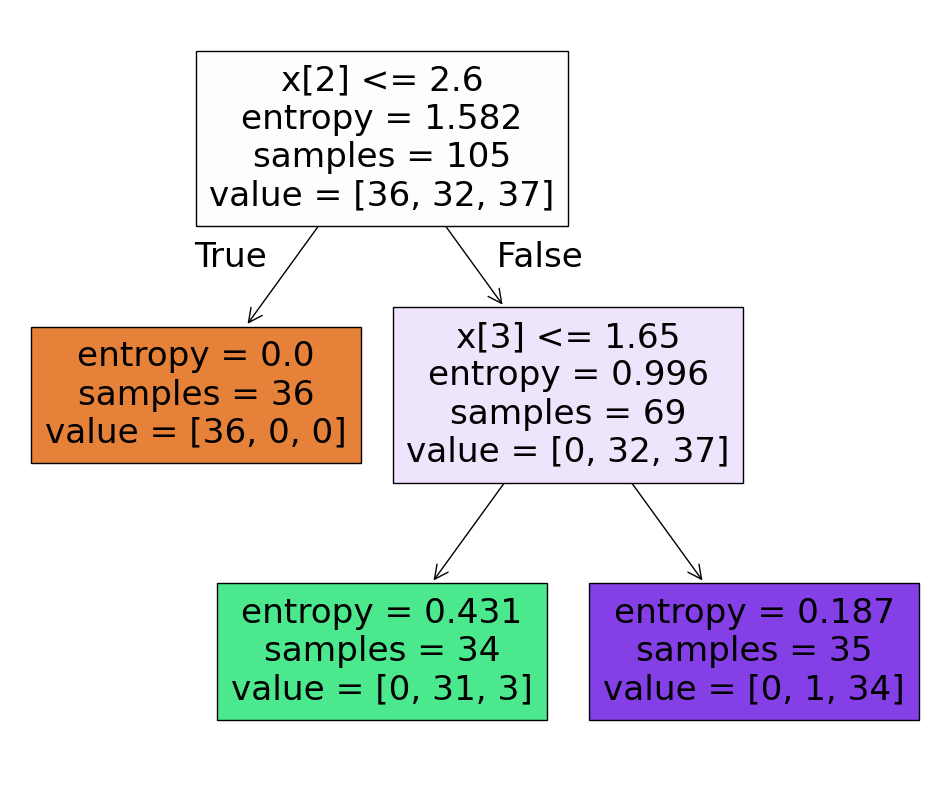

In [40]:
from sklearn import tree 
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)

In [41]:
y_pred=classifier.predict(X_test)

In [42]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [43]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [44]:
#Now we do pre pruning using hyperparameter tuing
#limit the grouwth of tree
params={
    'criterion':['geni','entropy','log_loss'], 
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6],
    'max_features':['sqrt','log2','auto']
}

In [45]:
from sklearn.model_selection import GridSearchCV

In [47]:
clf=DecisionTreeClassifier()
model=GridSearchCV(clf,param_grid=params,cv=5,scoring="accuracy")

In [48]:
model.fit(X_train,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['geni', 'entropy', ...], 'max_depth': [1, 2, ...], 'max_features': ['sqrt', 'log2', ...], 'splitter': ['best', 'random']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [49]:
model.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [50]:
model.best_score_

np.float64(0.9714285714285715)

In [51]:
y_pred=model.predict(X_test)

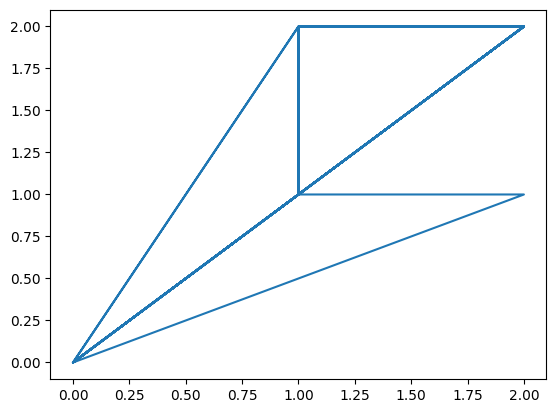

In [52]:
plt.plot(y_pred,y_test)

In [ ]:
# Create a complete dataframe with target for visualization
df_viz = df.copy()
df_viz['species'] = y
target_names = ['Setosa', 'Versicolor', 'Virginica']
df_viz['species_name'] = df_viz['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# 1. PAIRPLOT - Best overall visualization for Iris dataset
plt.figure(figsize=(12, 10))
sns.pairplot(df_viz, hue='species_name', palette='Set1')
plt.suptitle('Iris Dataset - Pairplot showing all feature relationships', y=1.02)
plt.show()

# 2. HEATMAP - Correlation between features
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

# 3. BOXPLOTS - Distribution of each feature by species
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
features = df.columns

for i, feature in enumerate(features):
    ax = axes[i//2, i%2]
    data_for_box = [df[y==j][feature].values for j in range(3)]
    ax.boxplot(data_for_box, labels=target_names)
    ax.set_title(f'{feature} by Species')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()

# 4. SCATTER PLOTS - Most discriminative features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
scatter = plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=y, cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Width')
plt.colorbar(scatter)

plt.subplot(1, 3, 2)
scatter = plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=y, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Width')
plt.colorbar(scatter)

plt.subplot(1, 3, 3)
scatter = plt.scatter(df['petal length (cm)'], df['sepal length (cm)'], c=y, cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('Petal vs Sepal Length')
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 1200x1000 with 0 Axes>

In [ ]:
# MODEL PERFORMANCE VISUALIZATION
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Setosa', 'Versicolor', 'Virginica']))